# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Links:
python library: https://pypi.python.org/pypi/citipy

Weather api: https://openweathermap.org/api

In [131]:
import random
from citipy import citipy
import requests
import json
from pprint import pprint
from api_keys import weather_api_key
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime

## Generate Cities List

In [104]:
# Generate cities lists
cities = []

# Loop to create randon latitudes and longitudes
for i in range(0,1500):
    lat = round(random.uniform(-90,90),2)
    lng = round(random.uniform(-180,180),2)
    # Use citipy to find the nearest city to the (lat, lng)
    city = citipy.nearest_city(lat, lng)
    # Use citipy to return the name of the neareat city
    city_name = city.city_name
    # Append city name to city list
    cities.append(city_name)
# Remove any duplicates in the cities list
cities = list(dict.fromkeys(cities))
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [157]:
# Build base URL for API call
weather_response = []
base_url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&units=imperial" + "&q="
counter = 0

#create lists empty lists to hold desired data
city_name = []
latitude = []
longitude = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
date = []
country = []

# API call loop
for citi in cities:
    query_url = base_url + citi
    try:
        response = requests.get(query_url).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record | {citi}")
    except:
        print(f"City not found | {citi}")

Processing Record | mar del plata
Processing Record | cape town
Processing Record | butaritari
Processing Record | lokosovo
Processing Record | port alfred
Processing Record | bluff
Processing Record | barrow
Processing Record | baltiysk
Processing Record | kapaa
Processing Record | ushuaia
Processing Record | mackay
Processing Record | chuy
Processing Record | qaanaaq
Processing Record | atuona
Processing Record | acarau
Processing Record | ilulissat
Processing Record | hobart
Processing Record | rikitea
Processing Record | kahului
Processing Record | japura
Processing Record | busselton
Processing Record | lebu
Processing Record | vaini
Processing Record | kodiak
Processing Record | yeniseysk
Processing Record | tete
Processing Record | qaqortoq
City not found | bolshoy tsaryn
Processing Record | pisco
Processing Record | puerto ayora
Processing Record | narsaq
Processing Record | saint-philippe
Processing Record | smithers
Processing Record | zaranj
Processing Record | port hardy
Ci

Processing Record | hirara
Processing Record | lagoa
Processing Record | shache
Processing Record | krasnovishersk
Processing Record | beroroha
Processing Record | filadelfia
Processing Record | jauja
Processing Record | wanlaweyn
Processing Record | alappuzha
City not found | manzil jamil
Processing Record | arlit
Processing Record | mekhe
Processing Record | canutama
Processing Record | auka
Processing Record | sainte-marie
Processing Record | severo-kurilsk
City not found | tidore
Processing Record | naples
Processing Record | butterworth
Processing Record | moranbah
Processing Record | longyearbyen
Processing Record | biak
Processing Record | stavern
Processing Record | port blair
Processing Record | awjilah
Processing Record | burns lake
Processing Record | nouadhibou
Processing Record | abu samrah
Processing Record | lipari
Processing Record | broken hill
Processing Record | tawau
Processing Record | coihaique
Processing Record | pembroke
Processing Record | mogadishu
Processing 

Processing Record | kudahuvadhoo
Processing Record | nhulunbuy
Processing Record | acapetahua
Processing Record | madarounfa
Processing Record | dongsheng
Processing Record | davila
Processing Record | nanae
Processing Record | kamennogorsk
Processing Record | jasper
Processing Record | nabire
Processing Record | kaeo
City not found | halalo
Processing Record | borogontsy
Processing Record | male
Processing Record | laguna
Processing Record | ritchie
Processing Record | port moresby
Processing Record | mujiayingzi
Processing Record | rucheng
Processing Record | russell
Processing Record | severo-yeniseyskiy
Processing Record | terme
Processing Record | kemijarvi
City not found | utiroa
Processing Record | meulaboh
Processing Record | muroto
Processing Record | ostersund
Processing Record | solhan
Processing Record | wuwei
Processing Record | atambua
Processing Record | yinchuan
Processing Record | kincardine
Processing Record | zhigansk
Processing Record | ucluelet
Processing Record | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [160]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 53},
 'cod': 200,
 'coord': {'lat': -7.38, 'lon': 108.21},
 'dt': 1600022473,
 'id': 1640902,
 'main': {'feels_like': 73.13,
          'grnd_level': 974,
          'humidity': 91,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 68.23,
          'temp_max': 68.23,
          'temp_min': 68.23},
 'name': 'Kawalu',
 'sys': {'country': 'ID', 'sunrise': 1600036874, 'sunset': 1600080268},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 291, 'speed': 1.07}}


In [161]:
# Create dictionary of results
weather_data_dict = {
    "City": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
#Create dataframe from dictionary
weather_data = pd.DataFrame(weather_data_dict)
# Export dataframe to csv
file_path = os.path.join("output_data","cities.csv")
weather_data.to_csv(file_path)


weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar del Plata,-38.00,-57.56,57.20,41,100,11.41,AR,1600021902
1,Cape Town,-33.93,18.42,55.99,83,57,7.00,ZA,1600021737
2,Butaritari,3.07,172.79,82.49,74,1,13.65,KI,1600022352
3,Lokosovo,61.13,74.82,47.80,93,2,4.47,RU,1600022352
4,Port Alfred,-33.59,26.89,60.48,64,0,10.16,ZA,1600022352


In [162]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.549075,21.122242,66.744057,69.946619,50.816726,7.749555,1.600022e+09
std,33.197701,90.618529,15.655982,22.240558,40.308970,4.809772,1.603957e+02
min,-54.800000,-175.200000,23.880000,3.000000,0.000000,0.040000,1.600022e+09
25%,-7.787500,-64.035000,52.792500,58.000000,2.000000,4.097500,1.600022e+09
50%,27.625000,27.450000,69.800000,75.000000,53.500000,6.930000,1.600022e+09
75%,46.677500,102.480000,78.800000,87.000000,90.750000,10.852500,1.600022e+09
max,78.220000,179.320000,104.130000,100.000000,100.000000,24.610000,1.600022e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

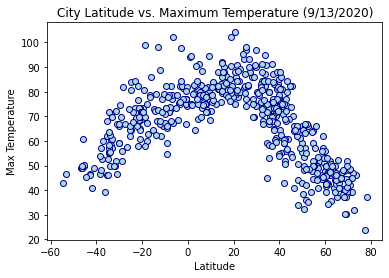

In [172]:
x_data = weather_data["Lat"]
y_data = weather_data["Max Temp"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"City Latitude vs. Maximum Temperature ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
output_path_fig1 = os.path.join("output_data","fig1.png")
plt.savefig(output_path_fig1)

## Latitude vs. Humidity Plot

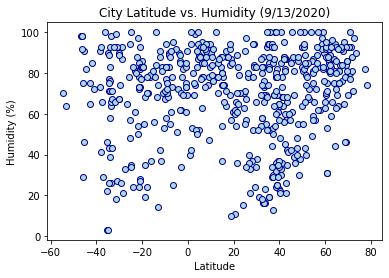

In [174]:
x_data = weather_data["Lat"]
y_data = weather_data["Humidity"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"City Latitude vs. Humidity ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
output_path_fig2 = os.path.join("output_data","fig2.png")
plt.savefig(output_path_fig2)

## Latitude vs. Cloudiness Plot

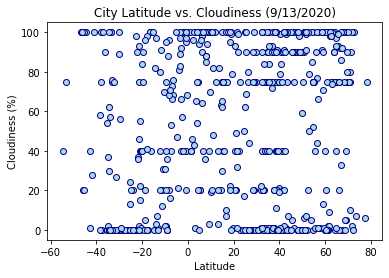

In [175]:
x_data = weather_data["Lat"]
y_data = weather_data["Cloudiness"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"City Latitude vs. Cloudiness ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
output_path_fig3 = os.path.join("output_data","fig3.png")
plt.savefig(output_path_fig3)

## Latitude vs. Wind Speed Plot

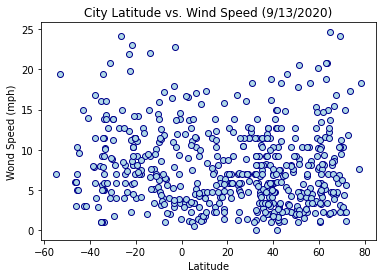

In [176]:
x_data = weather_data["Lat"]
y_data = weather_data["Wind Speed"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"City Latitude vs. Wind Speed ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Wond Speed (mph)")
output_path_fig4 = os.path.join("output_data","fig4.png")
plt.savefig(output_path_fig4)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


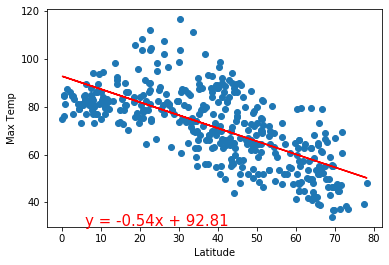

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


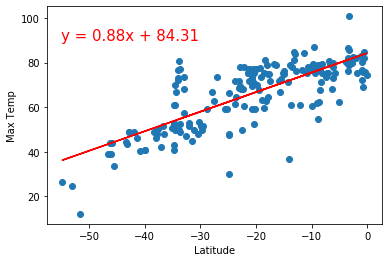

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


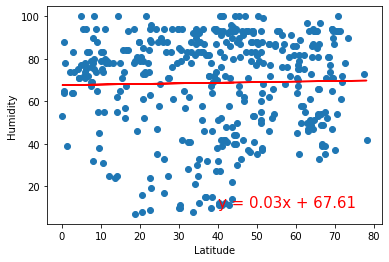

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


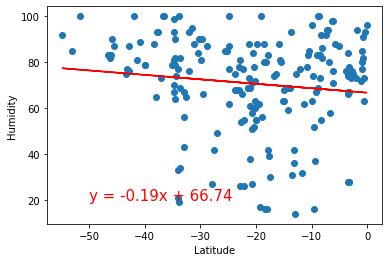

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


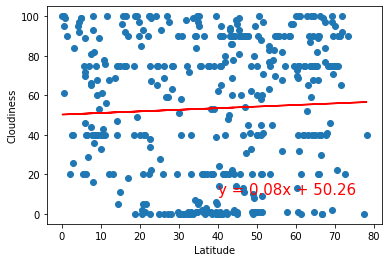

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


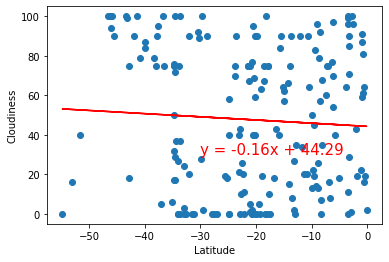

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


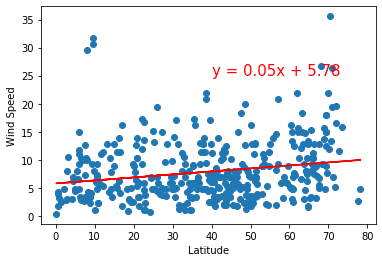

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


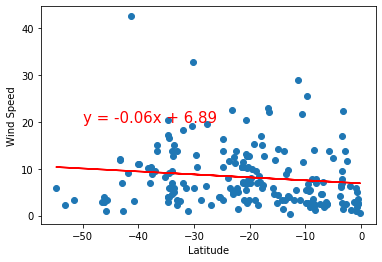